# Economic Freedom Index Analysis

### Import dependencies

In [1]:
%matplotlib inline
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

### Import CSV and build dataframes

In [2]:
#import csv into dataframe and preview
ef2019 = pd.read_csv("Data/economic_freedom_index2019_data.csv", encoding="ISO-8859-1")
ef2019.head()

,CountryID,CountryName,Region,WorldRank,RegionRank,2019Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,...,GovtExpenditureofGDP,PopulationMillions,GDPBillionsPPP,GDPGrowthRate,5YearGDPGrowthRate,GDPperCapita(PPP),Unemployment,Inflation,FDIInflowMillions,PublicDebtofGDP
0,29,Canada,Americas,8.0,1.0,77.7,87.0,69.4,84.6,76.8,...,40.3,36.7,"$1,769.30",3.0,2.1,"$48,265",6.3,1.6,"24,243.80",89.7
1,175,United States,Americas,12.0,2.0,76.8,79.3,78.6,77.4,75.1,...,37.8,325.9,"$19,390.60",2.3,2.2,"$59,501",4.4,2.1,"275,381.00",107.8
2,33,Chile,Americas,18.0,3.0,75.4,68.7,56.3,62.3,77.3,...,25.2,18.4,$451.10,1.5,2.2,"$24,537",7,2.2,"6,729.60",23.6
3,138,Saint Lucia,Americas,38.0,4.0,68.7,65.9,63.8,50.3,76.2,...,26.3,0.2,$2.50,3.0,1.9,"$14,450",21,0.1,92.4,71.3
4,81,Jamaica,Americas,39.0,5.0,68.6,60.7,49.2,45.0,80.2,...,28.3,2.8,$26.10,1.0,0.8,"$9,163",12.5,4.4,888,104.1


In [16]:
#build dataframe for overall stats
ef2019stats = ef2019[["Region", "CountryName", "2019Score"]]
ef2019stats = ef2019stats.groupby("Region")
ef2019stats = ef2019stats.describe()
ef2019stats.to_csv("./Data/ef2019stats.csv")
ef2019stats.head()

2019Score                                      \
                                 count       mean        std   min     25%   
Region                                                                       
Americas                          32.0  59.600000  11.927604  25.9  54.725   
Asia-Pacific                      43.0  60.634884  13.730135   5.9  54.800   
Europe                            44.0  68.627273   6.851222  52.3  64.425   
Middle East and North Africa      14.0  61.257143   9.324304  46.2  53.225   
Sub-Saharan Africa                47.0  54.182979   7.219398  38.9  50.100   

                                                   
                                50%     75%   max  
Region                                             
Americas                      62.20  67.225  77.7  
Asia-Pacific                  57.80  65.600  90.2  
Europe                        67.95  74.375  81.9  
Middle East and North Africa  60.90  66.475  77.6  
Sub-Saharan Africa            54.00  57.800  73.0

In [17]:
#build dataframe for government integrity stats
ef2019gisstats = ef2019[["Region", "CountryName", "GovernmentIntegrity"]]
ef2019gisstats = ef2019stats.groupby("Region")
ef2019gisstats = ef2019stats.describe()
ef2019gisstats.to_csv("./Data/ef2019gisstats.csv")
ef2019gisstats.head()

2019Score                                                        \
           count       mean       std        min        25%        50%   
count   5.000000   5.000000  5.000000   5.000000   5.000000   5.000000   
mean   36.000000  60.860456  9.810532  33.840000  55.455000  60.570000   
std    13.546217   5.165006  2.981325  18.458277   5.363575   5.197788   
min    14.000000  54.182979  6.851222   5.900000  50.100000  54.000000   
25%    32.000000  59.600000  7.219398  25.900000  53.225000  57.800000   

                             
             75%        max  
count   5.000000   5.000000  
mean   66.295000  80.080000  
std     5.891344   6.474334  
min    57.800000  73.000000  
25%    65.600000  77.600000

In [5]:
# Produce top 20 dataframe
ef2019top20 = ef2019.nlargest(20, '2019Score')
ef2019top20 = ef2019top20[["Region", "CountryName", "2019Score"]]
ef2019top20.head()

,Region,CountryName,2019Score
32,Asia-Pacific,Hong Kong,90.2
33,Asia-Pacific,Singapore,89.4
34,Asia-Pacific,New Zealand,84.4
76,Europe,Switzerland,81.9
35,Asia-Pacific,Australia,80.9


In [6]:
#Use correlation to determine the top 4 factors most closely associated with a high economic freedom score
ef2019corr = ef2019[["WorldRank","RegionRank","2019Score","PropertyRights","JudicalEffectiveness","GovernmentIntegrity",
                     "TaxBurden","GovtSpending","FiscalHealth","BusinessFreedom","LaborFreedom","MonetaryFreedom",
                     "TradeFreedom","InvestmentFreedom ","FinancialFreedom","TariffRate","IncomeTaxRate","CorporateTaxRate",
                     "TaxBurdenofGDP","GovtExpenditureofGDP ","PopulationMillions","GDPBillionsPPP","GDPGrowthRate",
                     "5YearGDPGrowthRate","GDPperCapita(PPP)","Unemployment","Inflation","FDIInflowMillions",
                     "PublicDebtofGDP"]]
ef2019corr.corr()

,WorldRank,RegionRank,2019Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,...,FinancialFreedom,TariffRate,IncomeTaxRate,CorporateTaxRate,TaxBurdenofGDP,GovtExpenditureofGDP,GDPGrowthRate,5YearGDPGrowthRate,Inflation,PublicDebtofGDP
WorldRank,1.000000,0.737060,-0.938328,-0.862262,-0.783510,-0.777058,0.001651,0.061147,-0.552224,-0.767427,...,-0.782137,0.546004,-0.027692,0.333975,-0.356061,-0.005270,-0.108975,0.004356,0.158491,0.024561
RegionRank,0.737060,1.000000,-0.713517,-0.567211,-0.606432,-0.578832,-0.092319,-0.200618,-0.308334,-0.542479,...,-0.594273,0.326258,-0.028547,0.138492,0.002812,0.209026,-0.056843,-0.095489,0.087730,0.077280
2019Score,-0.938328,-0.713517,1.000000,0.830409,0.804253,0.763715,0.137279,0.045461,0.563171,0.812523,...,0.790032,-0.636272,0.009201,-0.327574,0.298399,-0.129428,0.188446,0.063560,-0.276533,-0.036412
PropertyRights,-0.862262,-0.567211,0.830409,1.000000,0.822445,0.855428,-0.153225,-0.235260,0.350158,0.776943,...,0.727224,-0.492647,0.155824,-0.297578,0.485731,0.098852,-0.074934,0.071906,-0.198389,0.096942
JudicalEffectiveness,-0.783510,-0.606432,0.804253,0.822445,1.000000,0.878679,-0.113761,-0.135135,0.335370,0.726369,...,0.608063,-0.442519,0.182569,-0.216257,0.358283,0.032583,-0.022751,0.028141,-0.155026,0.074158
GovernmentIntegrity,-0.777058,-0.578832,0.763715,0.855428,0.878679,1.000000,-0.218628,-0.302520,0.315531,0.719176,...,0.625537,-0.403071,0.225080,-0.252158,0.421746,0.167446,-0.064211,0.013631,-0.152093,0.103467
TaxBurden,0.001651,-0.092319,0.137279,-0.153225,-0.113761,-0.218628,1.000000,0.393912,0.016279,0.093128,...,-0.051673,-0.265821,-0.898048,-0.555456,-0.588508,-0.403075,0.153649,0.209151,-0.010373,-0.237029
GovtSpending,0.061147,-0.200618,0.045461,-0.235260,-0.135135,-0.302520,0.393912,1.000000,0.082900,-0.145194,...,-0.131152,0.078780,-0.075622,0.216163,-0.654658,-0.887607,-0.050105,0.293019,-0.007844,-0.076822
FiscalHealth,-0.552224,-0.308334,0.563171,0.350158,0.335370,0.315531,0.016279,0.082900,1.000000,0.343510,...,0.260901,-0.268554,0.075790,-0.063895,0.154495,-0.141536,0.046226,0.179097,-0.127881,-0.313850
BusinessFreedom,-0.767427,-0.542479,0.812523,0.776943,0.726369,0.719176,0.093128,-0.145194,0.343510,1.000000,...,0.620251,-0.550077,0.000347,-0.344350,0.389648,0.002019,-0.054175,0.034833,-0.170139,0.054894


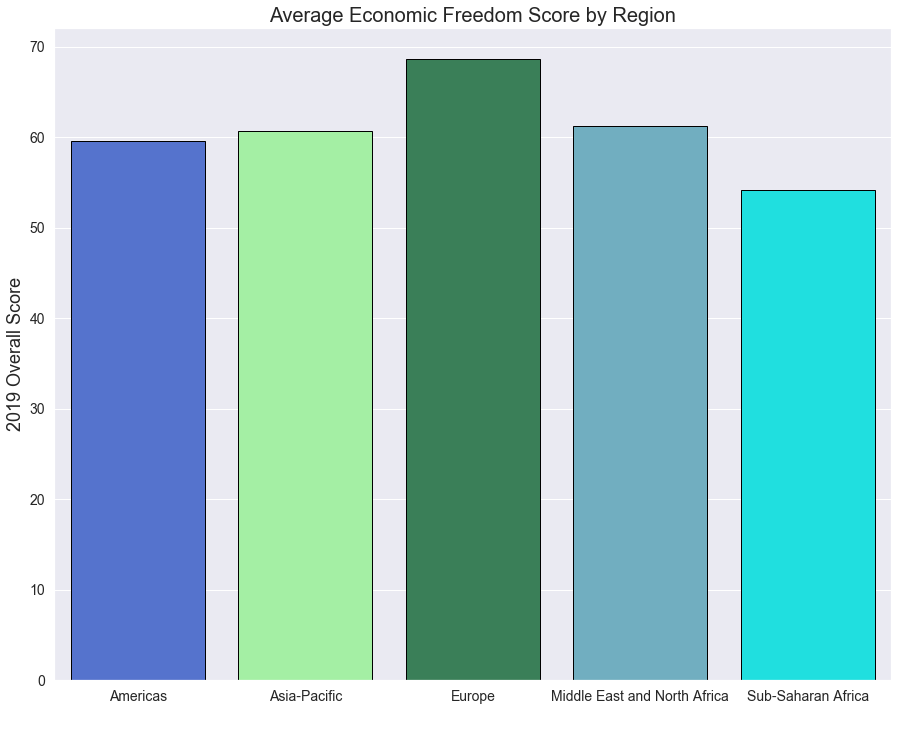

In [7]:
#Plot a bar graph that shows the average economic freedom score by region
sns.set(style="darkgrid")
colors = ["royalblue", "palegreen", "seagreen", "c", "aqua"]
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x="Region", y="2019Score", data=ef2019, ci=None, palette=colors, edgecolor="black", dodge=False)
ax.set_xlabel(" ", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("2019 Overall Score", fontdict=None, labelpad=None, fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title("Average Economic Freedom Score by Region", fontsize=20)
plt.savefig("./Images/ERScorebyRegion.png")
plt.show(block=False)

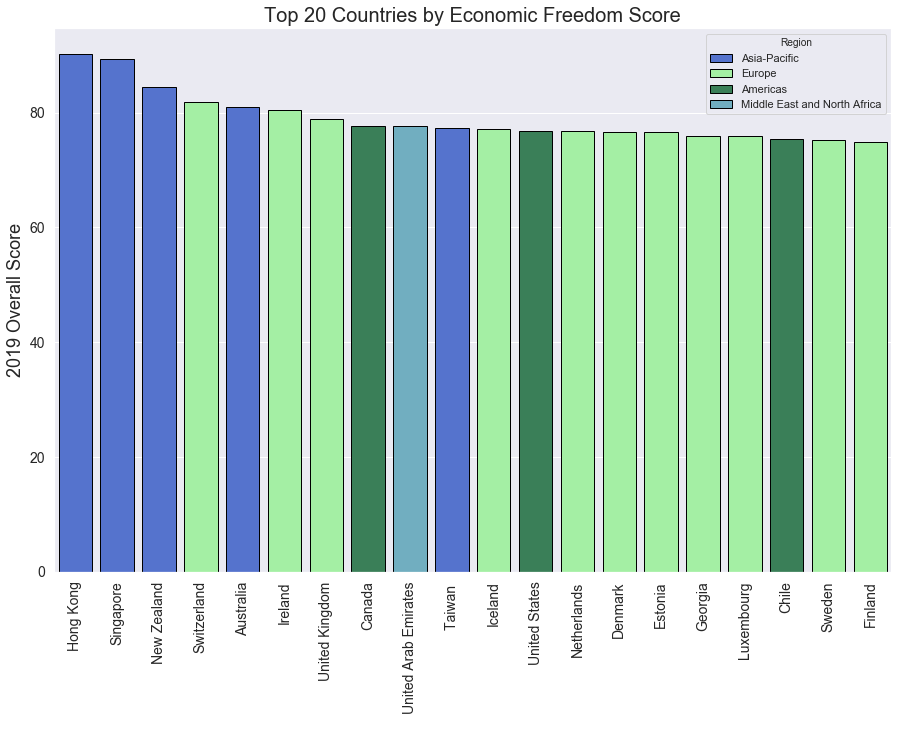

In [10]:
#Plot a bar graph that shows the countries with the top 20 overall economic freedom score and show their region.
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.set_context(rc = {'patch.linewidth': 1.0})
sns.barplot(x="CountryName", y="2019Score", data=ef2019top20, ci=None, palette=colors, edgecolor="black", hue="Region", dodge=False)
plt.title("Top 20 Countries by Economic Freedom Score", fontsize=20)
ax.set_ylabel("2019 Overall Score", fontdict=None, labelpad=None, fontsize=18)
ax.set_xlabel(" ", fontdict=None, labelpad=None, fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.savefig("./Images/Top20Countries.png")
plt.show(block=False)

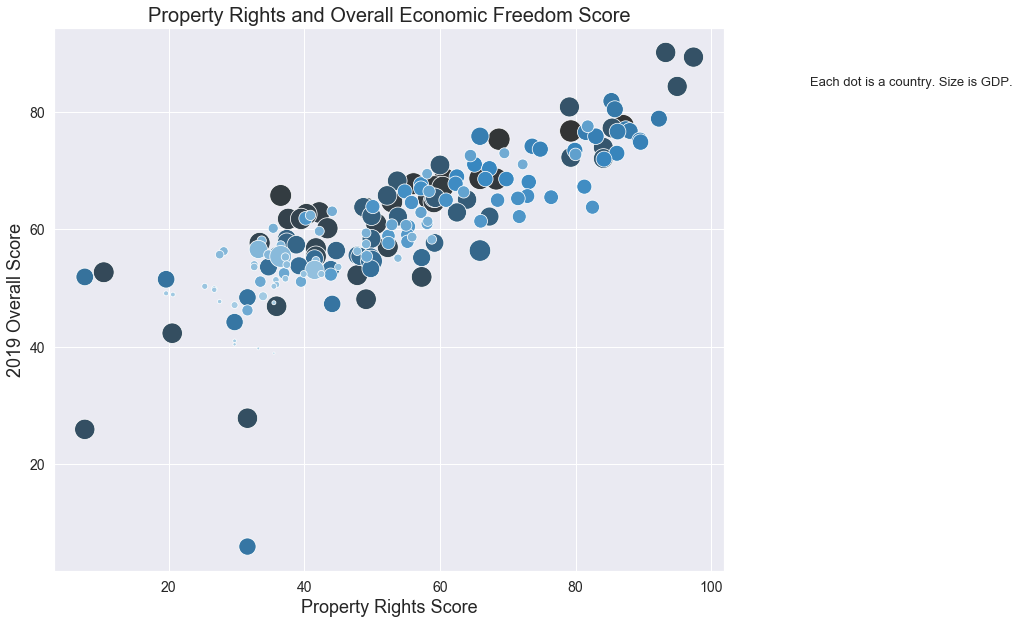

In [11]:
# Build bubble plot for overall economic freedom score and property rights score.
sns.set()
plt.figure(figsize=(12,10))
ax = sns.scatterplot (x="PropertyRights", y="2019Score",
                     hue="CountryName", size="GDPBillionsPPP",
                     palette="Blues_d", edgecolors='black', sizes=(5,500),
                     legend=False,
                     data=ef2019)
plt.title("Property Rights and Overall Economic Freedom Score", fontsize=20)
ax.set_ylabel("2019 Overall Score", fontdict=None, labelpad=None, fontsize=18)
ax.set_xlabel("Property Rights Score", fontdict=None, labelpad=None, fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.savefig("./Images/Score_Property.png")
plt.figtext(1,.8, "Each dot is a country. Size is GDP.", fontsize=13)
plt.show()

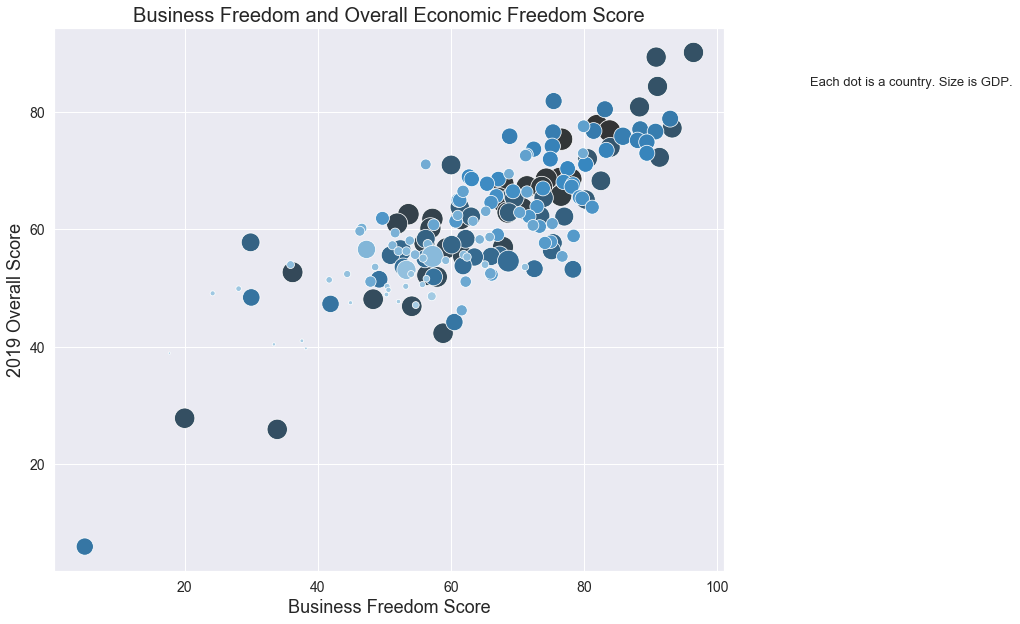

In [12]:
# Build bubble plot for overall economic freedom score and business freedom score.
sns.set()
plt.figure(figsize=(12,10))
ax = sns.scatterplot (x="BusinessFreedom", y="2019Score",
                     hue="CountryName", size="GDPBillionsPPP",
                     palette="Blues_d", sizes=(5,500),
                     legend=False,
                     data=ef2019)
ax.set_ylabel("2019 Overall Score", fontdict=None, labelpad=None, fontsize=18)
ax.set_xlabel("Business Freedom Score", fontdict=None, labelpad=None, fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title("Business Freedom and Overall Economic Freedom Score", fontsize=20)
plt.savefig("./Images/Score_Business.png")
plt.figtext(1,.8, "Each dot is a country. Size is GDP.", fontsize=13)
plt.show()

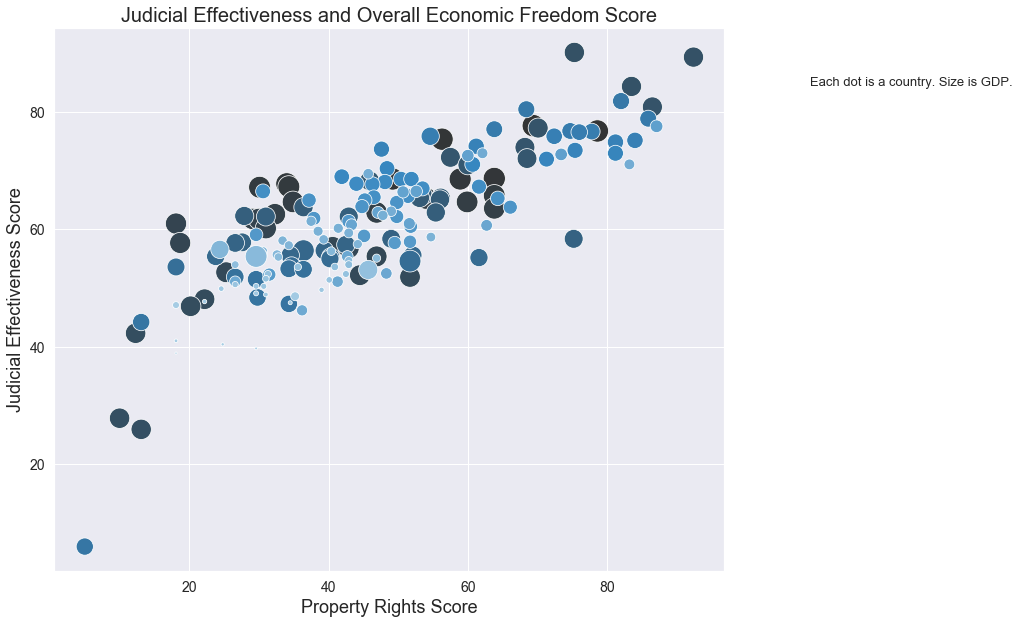

In [13]:
# Build bubble plot for overall economic freedom score and judicial effectiveness score.
sns.set()
plt.figure(figsize=(12,10))
ax = sns.scatterplot (x="JudicalEffectiveness", y="2019Score",
                     hue="CountryName", size="GDPBillionsPPP",
                     palette="Blues_d", sizes=(5,500),
                     legend=False,
                     data=ef2019)
ax.set_ylabel("Judicial Effectiveness Score", fontdict=None, labelpad=None, fontsize=18)
ax.set_xlabel("Property Rights Score", fontdict=None, labelpad=None, fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title("Judicial Effectiveness and Overall Economic Freedom Score", fontsize=20)
plt.savefig("./Images/Score_Judicial.png")
plt.figtext(1,.8, "Each dot is a country. Size is GDP.", fontsize=13)
plt.show()

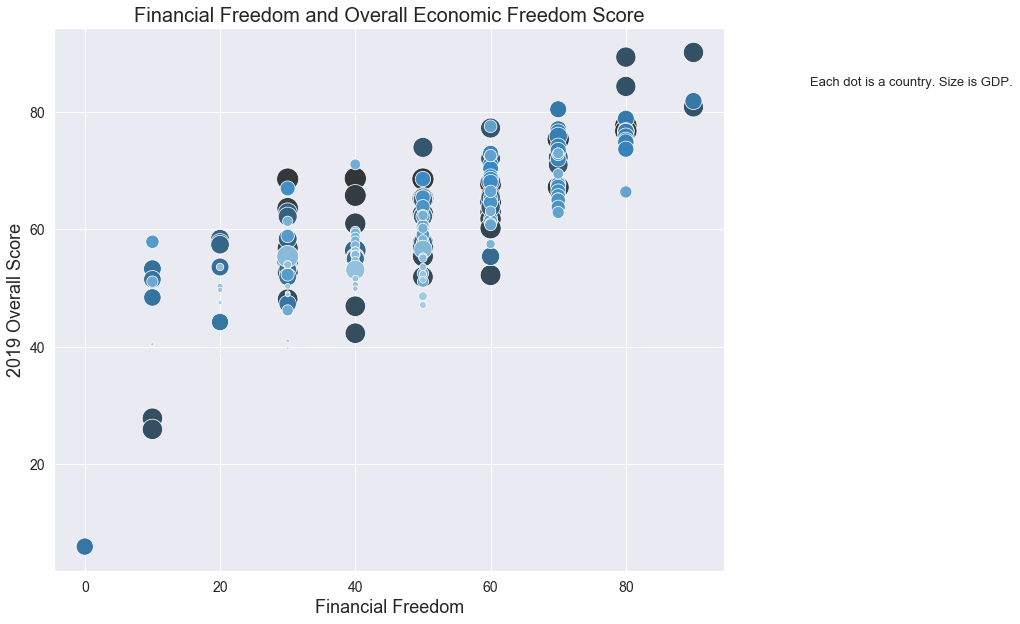

In [14]:
# Build bubble plot for overall economic freedom score and financial freedom score.
sns.set()
plt.figure(figsize=(12,10))
ax = sns.scatterplot (x="FinancialFreedom", y="2019Score",
                     hue="CountryName", size="GDPBillionsPPP",
                     palette="Blues_d", sizes=(5,500),
                     legend=False,
                     data=ef2019)
ax.set_ylabel("2019 Overall Score", fontdict=None, labelpad=None, fontsize=18)
ax.set_xlabel("Financial Freedom", fontdict=None, labelpad=None, fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title("Financial Freedom and Overall Economic Freedom Score", fontsize=20)
plt.savefig("./Images/Score_FinancialFreedom.png")
plt.figtext(1,.8, "Each dot is a country. Size is GDP.", fontsize=13)
plt.show()